In [1]:
#STEP-1
#importing all libraries 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML

In [2]:
#STEP-2
#loading data
boston = load_boston()

In [3]:
# dataset overview
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#STEP-3
#puting data into pandas dataframe
features = pd.DataFrame(boston.data,columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
#STEP-4
#puting target into a new pandas dataframe
target =pd.DataFrame(boston.target,columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [6]:
#STEP-5
#concatinating all features and targets into a single dataframe
#maksure use "axis = 1" to concatinate column wise
df = pd.concat([features,target], axis =1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
#overall view of the new dataframe
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
#min target value
min(target['target'])


5.0

In [9]:
#max target value
max(target['target'])

50.0

In [10]:
#VISUALIZATION OF DATA
#STEP-6
#getting correlation between the atrributes and the target
corr = df.corr('pearson')
corrs = [abs(corr[attri] ["target"]) for attri in list(features)]
corrs

[0.3883046085868114,
 0.3604453424505447,
 0.483725160028373,
 0.1752601771902975,
 0.4273207723732817,
 0.6953599470715389,
 0.3769545650045959,
 0.24992873408590394,
 0.3816262306397776,
 0.46853593356776646,
 0.507786685537561,
 0.33346081965706653,
 0.7376627261740143]

In [11]:
#converting into list of tuples using zip function
l =list(zip(corrs,list(features)))
print (l)


[(0.3883046085868114, 'CRIM'), (0.3604453424505447, 'ZN'), (0.483725160028373, 'INDUS'), (0.1752601771902975, 'CHAS'), (0.4273207723732817, 'NOX'), (0.6953599470715389, 'RM'), (0.3769545650045959, 'AGE'), (0.24992873408590394, 'DIS'), (0.3816262306397776, 'RAD'), (0.46853593356776646, 'TAX'), (0.507786685537561, 'PTRATIO'), (0.33346081965706653, 'B'), (0.7376627261740143, 'LSTAT')]


In [12]:
#sorting list to decednding order using sort and lambda
l.sort(key= lambda x:x[0],reverse = True)
print (l)

[(0.7376627261740143, 'LSTAT'), (0.6953599470715389, 'RM'), (0.507786685537561, 'PTRATIO'), (0.483725160028373, 'INDUS'), (0.46853593356776646, 'TAX'), (0.4273207723732817, 'NOX'), (0.3883046085868114, 'CRIM'), (0.3816262306397776, 'RAD'), (0.3769545650045959, 'AGE'), (0.3604453424505447, 'ZN'), (0.33346081965706653, 'B'), (0.24992873408590394, 'DIS'), (0.1752601771902975, 'CHAS')]


In [13]:
corrs, labels=list(zip(*l))
corrs, labels


((0.7376627261740143,
  0.6953599470715389,
  0.507786685537561,
  0.483725160028373,
  0.46853593356776646,
  0.4273207723732817,
  0.3883046085868114,
  0.3816262306397776,
  0.3769545650045959,
  0.3604453424505447,
  0.33346081965706653,
  0.24992873408590394,
  0.1752601771902975),
 ('LSTAT',
  'RM',
  'PTRATIO',
  'INDUS',
  'TAX',
  'NOX',
  'CRIM',
  'RAD',
  'AGE',
  'ZN',
  'B',
  'DIS',
  'CHAS'))

In [14]:
index = np.arange(len (labels))
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

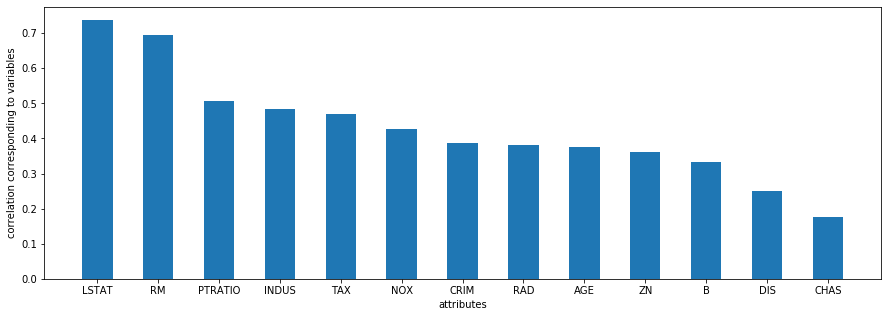

In [15]:
#STEP-7
#ploting the chart
plt.figure(figsize=(15,5))
plt.bar(index,corrs, width =.5)
plt.xlabel("attributes")
plt.ylabel("correlation corresponding to variables")
plt.xticks(index,labels)
plt.show()

In [47]:
#STEP-8
#normalisation 
X=df['LSTAT'].values
Y=df['target'].values

x_scaler= MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))#(-1,1) to convert 1d to 2d where -1 will be replaced by actual array LSTAT values
X=X[:, -1]

y_scaler= MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]

In [48]:
#STEP-9
#splitting into training and testing sets
x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.2)


In [49]:
#STEP-10
#defining fuctions(error,update and gradient decent) to run loss fuction
def error(m,x,c,t):
    N= x.size
    e = sum(((m * x + c) - t) ** 2)
    return e * 1 / (2 * N)




In [50]:
def update(m,x,c,t,learning_rate):
    grad_m=sum(2 * ((m * x + c) - t) * x)
    grad_c=sum(2 * ((m * x + c) - t))
    m= m - grad_m * learning_rate
    c= c - grad_c * learning_rate
    return m,c

In [51]:
def gradient_decent(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
    m=init_m
    c=init_c
    error_values=list()
    mc_values=list()
    for i in range(iterations):
        e= error(m,x,c,t)
        if e < error_threshold:
            print ('error value is below the threshold value. gradient decent stoped ')
            break
        error_values.append(e)
        m,c = update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m, c, error_values, mc_values

In [52]:
#STEP-11
#runing the gradient decent function 
%time
init_m=0.9
init_c=0
iterations = 250
learning_rate = 0.001
error_threshold =0.001
m,c,error_values,mc_values = gradient_decent(init_m,init_c,x_train,y_train,learning_rate,iterations,error_threshold)


Wall time: 0 ns


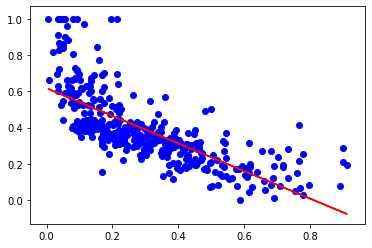

In [53]:
#ploting graph

plt.scatter(x_train,y_train,color="b")
plt.plot(x_train,(m * x_train + c), color="r")


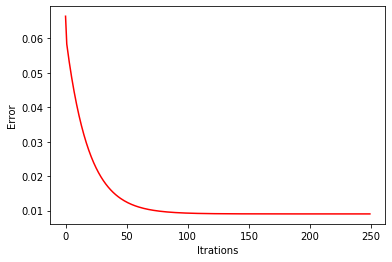

In [54]:
#plotting error
plt.plot(np.arange(len(mc_values)),error_values, color='r')
plt.xlabel('Itrations')
plt.ylabel('Error')
plt.show()

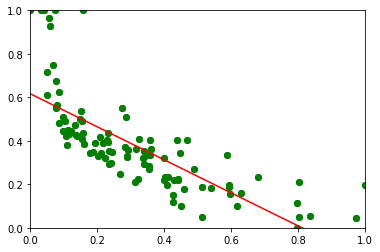

In [55]:
#VISUALIZATION OF THE MODEL
#STEP-12
mc_values_anim = mc_values[:250:5]
fig,ax =plt.subplots()
ln,=plt.plot([],[],'ro-', animated=True)
def init():
    plt.scatter(x_test,y_test,color="g")
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,1.0)
    return ln,
def update_frame(frame):
    m,c = mc_values_anim[frame]
    x1,y1= -.5,m * -.5 + c
    x2,y2= 1.5,m * 1.5 + c
    ln.set_data([x1,x2],[y1,y2])
    return ln,
anim = FuncAnimation(fig,update_frame,frames= range(len(mc_values_anim)),init_func=init, blit=True )
HTML(anim.to_html5_video())

In [56]:
#STEP-13
#getting the predicted values
predicted = m * x_test + c


In [57]:
#checking error between predicted and actual value 
mean_squared_error(predicted,y_test)

0.02275271353184686

In [58]:
p = pd.DataFrame(list(zip(x_test,y_test,predicted)),columns=['x value','y value','y predicted value'])
p.head()

,x value,y value,y predicted value
0,0.286976,0.508889,0.398744
1,0.050497,0.717778,0.578397
2,0.187086,0.346667,0.474630
3,0.231236,0.404444,0.441090
4,0.338300,0.322222,0.359753


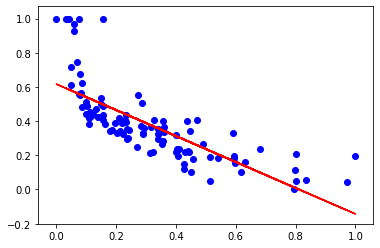

In [59]:
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_test,predicted,color='red')
plt.show()

In [60]:
#reshaping the arrays and reverting normalization
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)
predicted=predicted.reshape(-1,1)
x_test_scaled=x_scaler.inverse_transform(x_test)
y_test_scaled=y_scaler.inverse_transform(y_test)
predicted_scaled=y_scaler.inverse_transform(predicted)

#removing the excess dimensions using slicing 
x_test_scaled=x_test_scaled[:,-1]
y_test_scaled=y_test_scaled[:,-1]
predicted_scaled=predicted_scaled[:,-1]

In [61]:
p_scaled = pd.DataFrame(list(zip(x_test_scaled,y_test_scaled,predicted_scaled)),columns=['x value','y value','y predicted value'])
p_scaled.head()


,x value,y value,y predicted value
0,12.13,27.9,22.943494
1,3.56,37.3,31.027876
2,8.51,20.6,26.358367
3,10.11,23.2,24.849031
4,13.99,19.5,21.188891
